#Project Name: SALES PREDICTION USING PYTHON 

**Problem Statement:
Build the model which predict sales based on money spent on different platform in market.**

#Data for use:


We use Advertising dataset and analyse the relationship between "Tv advertising" and "sales" using simple linear regression model.
In this project we are building linear regression model to predict the sales using variables. 

**Let's start the model.**

First we have to import the python libraries.:

In [ ]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Now we have to mount drive to access dataset.

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mounted drive safely,means that we can access the dataset.

Now load the dataset and read the content of files.

In [ ]:
#Dataset loding
df=pd.read_csv("/content/drive/MyDrive/OBISIP/Sales_Prediction/Advertising.csv")

Dataset loaded successfully.Read the Advertising.csv file.

In [ ]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In Advertising dataset there are 200 rows and 5 columns.
Use this data and do linear regression.

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#Data Inspection
df.shape

(200, 5)

In [ ]:
#Checking for data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#Data Cleaning

Checking for null values

In [ ]:
df.isnull().sum()*100/df.shape[0]

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

In this dataset there are no null values in dataset so it's clean.

Now lets check outlier analysis(Tv,Newspaper,Radio)

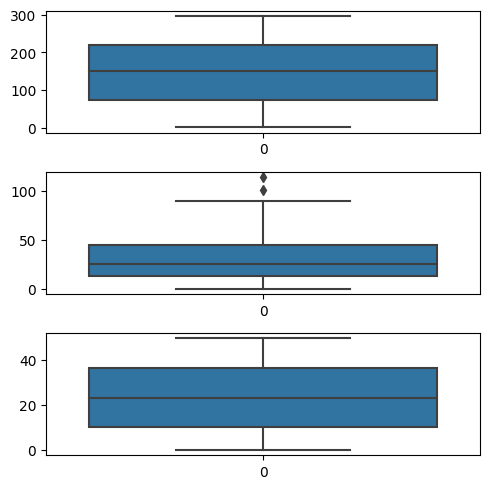

In [ ]:
#Code for Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

Now we have to check target variable sales.

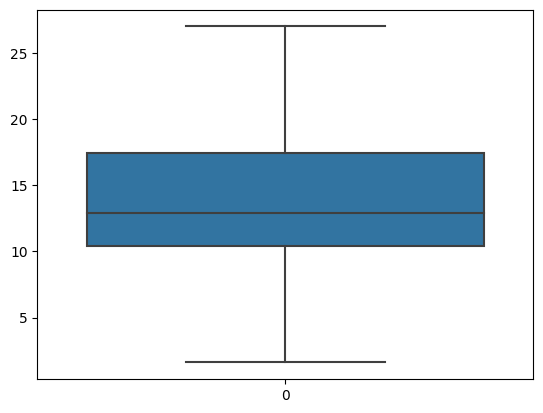

In [ ]:

sns.boxplot(df['Sales'])
plt.show()

Now we check how many sales are related with other variables using scatter plot.

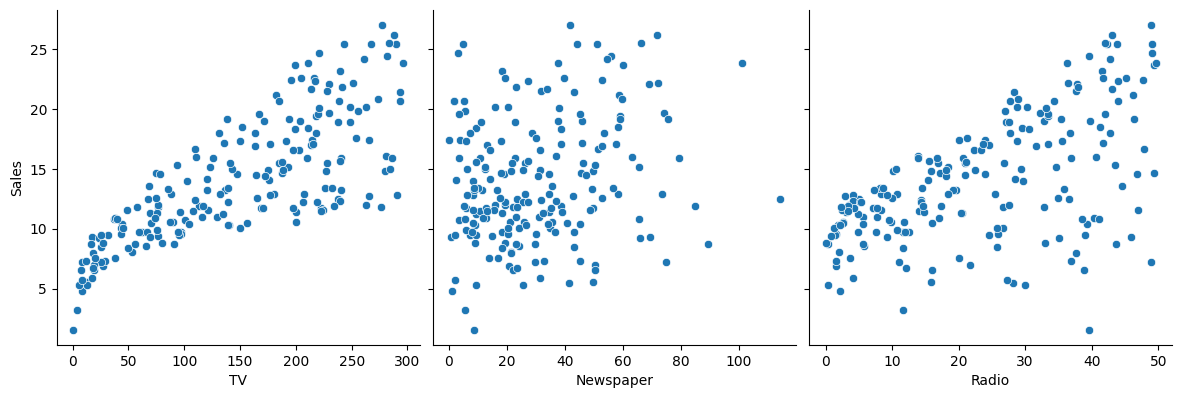

In [ ]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

#Correlation between variable.

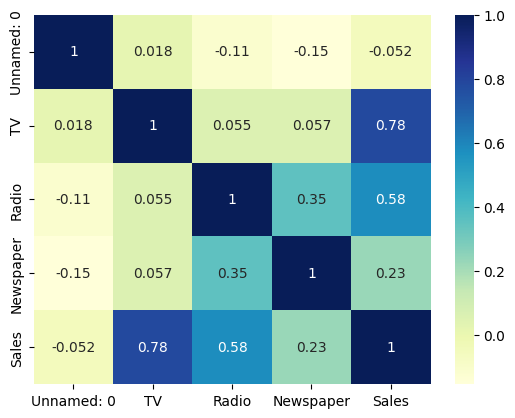

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Here variable TV seems to be most correlated with Sales.Now lets perform simple linear regression using TV as our feature variable.

#Model Building

**Performing Simple Linear Regression**

Equation of linear regression

y=c+m1x1+m2x2+...+mnxn

y  is the response

c  is the intercept

m1  is the coefficient for the first feature

mn  is the coefficient for the nth feature

In our case:

y=c+m1×TV
 
The  m  values are called the model coefficients or model parameters.



**Generic steps in model building using ststmodels.**

We first assign the feature variable TV.In this case to the variable x and response variable Sales to the variable y.

In [ ]:
x=df['TV']
y=df['Sales']

In [ ]:
x
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

#Train-Test Split
Now we need to split our variable into training and testing sets.To perform this step we have to import train_test_split from the sklearn.model selection library.It is usually a good practice to keep 70% of data in your train dataset and 30% of data in test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.7,test_size=0.3, random_state=100)


Lets l.ook at train dataset.

In [ ]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

**Building a Linear Model**

First we need to import the statmodel.api library using this we perform the linear regression

In [ ]:
import statsmodels.api as sm

By default,the statsmodels library fits a line on the dataset which passes  through the origin,but in order to have an intercept you need to manually use the add_constant attribute of statsmodels.And once you have added the constant to your x_train dataset,you can go ahead and fit a regression line using OLS(Ordinary Least Squares)attribute of statsmodels as below. 

In [ ]:
#Add constant to get an intercept
x_train_sm=sm.add_constant(x_train)

#Fit the regression line using OLS
lr=sm.OLS(y_train,x_train_sm).fit()

In [ ]:
#Print the parameters i.e the intercept and slope of the regression line fitted 
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [ ]:
#Performing a summary operation lists out all the different parameters of the regression line fitted 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.84e-30
Time:                        08:44:35   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

Some of the key statisctics from summary is the values we are concerned with are-

The coefficients and significance  (p-values)
R-Squared

F statistic and its significance.

1. The coefficient for TV is 0.054 with a very low p value.
->The coefficient is statistically significant so the association is  not purely by chance.
2. R-squared is 0.816
->Meaning that 81.6% of variance in Sales is explained by TV.This is a decent R-squared value.
3. F statistic has very low p value(Partially low).
->Means that the model fit is statistically significant and the expalined varaince is not purely by chance. 
The fit is significant.Lets visualize how well the model fit the data.

From the parameters that we get our linear regression equation becomes:

Sales=6.948 + 0.54xTV


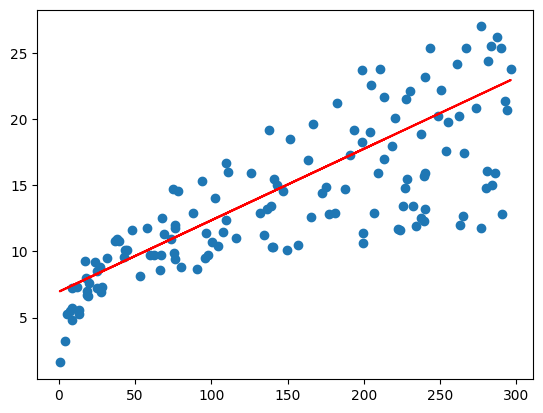

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948 + 0.054 * x_train,'r')
plt.show()

Above scatter plot shows the relation between TV and Sales,also shows linear regresion .

#Model Evaluation

**Distribution of error terms.**

We need to check if error terms are also normally distributed(It is major assumption of linear regression).Lets plot histogram of error terms. 

In [ ]:
y_train_pred=lr.predict(x_train_sm)
res=(y_train - y_train_pred)
fig=plt.figure()

<Figure size 640x480 with 0 Axes>

<ipython-input-37-db34afd153e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


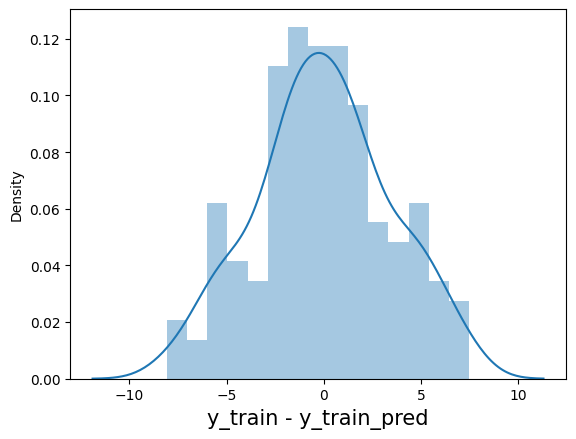

In [ ]:

sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)                #plot heading
plt.xlabel('y_train - y_train_pred',fontsize=15)      # x-label
plt.show()

#Predictions on Test set

Now  we have fitted regression line on train dataset and its time to make some predictions on test data.For this we first need to add constant to the x_test data like you did for x_train and then you can simply go on and predict the y values corresponding to x_test using the predict attribute of the fitted regression line.

In [ ]:
#add constant to x_test
x_test_sm=sm.add_constant(x_test)

#perdict the y values corresponding to x_test_sm
y_pred=lr.predict(x_test_sm)

In [ ]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

We first import the libraries for mean squared and r square. 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

To return the mean squared error we will take a square root

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.8241456288327003

**Checking R squared on Test set**

In [ ]:

r_squared=r2_score(y_test,y_pred)
r_squared

0.5942987267783303

**Visualizing the fit on Test data.**

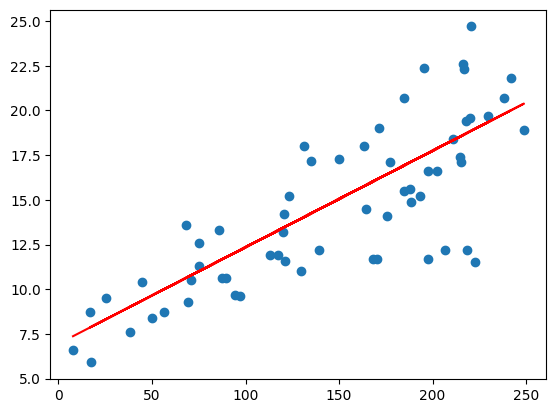

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.948 + 0.054 * x_test,'r')
plt.show() 

**Conclusion**
This way we can predict the sales analysis with the help of dataset.Then train and test the dataset.